<a href="https://colab.research.google.com/github/hurutta/XFedAi/blob/main/XFedAi_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
import time
import timeit

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset  
from torch.utils.data import TensorDataset

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/ML/ct_data_clean/COVID')

for file in tqdm(myFileList):
    #print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/ML/ct_data_clean/COVID


100%|██████████| 1002/1002 [04:43<00:00,  3.53it/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
img = pd.read_csv('/content/img_pixels.csv')
img.shape

(1001, 10000)

In [ ]:
x = np.array(img.iloc[0])
df = pd.DataFrame({"pixels": [x],"cvd": 1})

In [ ]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1


In [ ]:
for i in range(1,len(img),1):
    x = np.array(img.iloc[i])
    dict = {'pixels': x,"cvd": 1}
    df = df.append(dict, ignore_index = True)
    #print(i,x)

In [139]:
args = {
    "batch_size" : 64,
    "num_clients": 2,
    "frac": 1,
    "ep_local": 2,
    "bs_local": 10,
    "epochs": 100,
    #"dataset": "CIFAR10",
    "model": "CNN",
    "iid": "iid",
    
    # Unlearning params
    "unlearned_clients": [0], 
    "t": 2, # calibration_interval,
    "r": 0.5 # local_calibration_epoch_ratio r = Ecali/Eloc
    
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cpu


In [ ]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1
...,...,...
996,"[66, 70, 72, 70, 63, 80, 165, 216, 209, 206, 2...",1
997,"[206, 207, 208, 208, 206, 209, 204, 205, 205, ...",1
998,"[196, 194, 194, 195, 193, 193, 195, 199, 195, ...",1
999,"[73, 66, 117, 209, 212, 204, 206, 205, 208, 21...",1


In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/ML/ct_data_clean/non-COVID')

for file in tqdm(myFileList):
    #print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels2.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/ML/ct_data_clean/non-COVID


100%|██████████| 984/984 [04:38<00:00,  3.53it/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
img2 = pd.read_csv('/content/img_pixels2.csv')
img2.shape

(983, 10000)

In [ ]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1
...,...,...
996,"[66, 70, 72, 70, 63, 80, 165, 216, 209, 206, 2...",1
997,"[206, 207, 208, 208, 206, 209, 204, 205, 205, ...",1
998,"[196, 194, 194, 195, 193, 193, 195, 199, 195, ...",1
999,"[73, 66, 117, 209, 212, 204, 206, 205, 208, 21...",1


In [ ]:
for i in range(0,len(img2),1):
    x = np.array(img2.iloc[i])
    dict = {'pixels': x,"cvd": 0}
    df = df.append(dict, ignore_index = True)
    #print(i,x)

In [ ]:
df.shape

(1984, 2)

In [ ]:
df.head()

,pixels,cvd
0,"[76, 67, 65, 154, 236, 216, 201, 204, 205, 204...",1
1,"[205, 205, 205, 207, 207, 206, 205, 206, 203, ...",1
2,"[254, 255, 253, 248, 251, 253, 254, 252, 253, ...",0
3,"[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 6...",1
4,"[254, 254, 251, 251, 252, 253, 254, 253, 253, ...",0


In [141]:
df = df.sample(frac=1).reset_index(drop=True)
df1=df.iloc[0:1104]
df2=df.iloc[1104:1764]
df3=df.iloc[1764:1984]

In [142]:
df3.shape

(220, 2)

In [143]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 100, 100))
    image_label = np.array(list(map(int, data['cvd'])))

    for i, row in enumerate(data.index):
        image = data.loc[row, 'pixels']
        image = np.reshape(image, (100, 100))
        image_array[i] = image
        
    return image_array, image_label

In [144]:
df1['cvd'].value_counts()

1    565
0    539
Name: cvd, dtype: int64

In [145]:
status = {0: 'no_covid', 1: 'covid'}
print(df.shape)
train_image_array, train_image_label = prepare_data(df1)
val_image_array, val_image_label = prepare_data(df2)
test_image_array, test_image_label = prepare_data(df3)

(1984, 2)


In [146]:
train_image_array[0]

array([[235., 235., 234., ..., 212., 204., 203.],
       [234., 231., 231., ..., 237., 224., 211.],
       [234., 228., 229., ..., 232., 231., 238.],
       ...,
       [251., 246., 253., ..., 255., 250., 237.],
       [245., 238., 237., ..., 255., 251., 240.],
       [243., 215., 242., ..., 255., 254., 237.]])

In [147]:
#reshape and scale
train_images = train_image_array.reshape((train_image_array.shape[0], 1, 100, 100))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 1, 100, 100))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 1, 100, 100))
test_images = test_images.astype('float32')/255

In [148]:
train_images[0]

array([[[0.92156863, 0.92156863, 0.91764706, ..., 0.83137256,
         0.8       , 0.79607844],
        [0.91764706, 0.90588236, 0.90588236, ..., 0.92941177,
         0.8784314 , 0.827451  ],
        [0.91764706, 0.89411765, 0.8980392 , ..., 0.9098039 ,
         0.90588236, 0.93333334],
        ...,
        [0.9843137 , 0.9647059 , 0.99215686, ..., 1.        ,
         0.98039216, 0.92941177],
        [0.9607843 , 0.93333334, 0.92941177, ..., 1.        ,
         0.9843137 , 0.9411765 ],
        [0.9529412 , 0.84313726, 0.9490196 , ..., 1.        ,
         0.99607843, 0.92941177]]], dtype=float32)

In [149]:
print(type(train_images))
train_image_label.shape

<class 'numpy.ndarray'>


(1104,)

In [150]:
train_labels = train_image_label
val_labels = val_image_label
test_labels = test_image_label

In [151]:
test_labels

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [152]:
#Convert to tensor
train_images = torch.from_numpy(train_images)
train_labels = torch.from_numpy(train_labels)
val_images = torch.from_numpy(val_images)
val_labels = torch.from_numpy(val_labels)
test_images = torch.from_numpy(test_images)
test_labels = torch.from_numpy(test_labels)

In [153]:
#type(train_images)
#train_labels[1]
train_labels

tensor([0, 1, 1,  ..., 0, 0, 1])

In [154]:
# to dataset
dataset_train = TensorDataset(train_images, train_labels)
dataset_val = TensorDataset(val_images, val_labels)
dataset_test = TensorDataset(test_images, test_labels)

In [155]:
type(dataset_train)

torch.utils.data.dataset.TensorDataset

In [156]:
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=args["batch_size"], shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=args["batch_size"], shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset_val, batch_size=args["batch_size"], shuffle=True)

In [157]:
print(train_loader)

In [158]:
c=0
i=1
for x, y in train_loader:
    print(i,x.shape, y.shape)
    c+=64
    i+=1
print(c)

1 torch.Size([64, 1, 100, 100]) torch.Size([64])
2 torch.Size([64, 1, 100, 100]) torch.Size([64])
3 torch.Size([64, 1, 100, 100]) torch.Size([64])
4 torch.Size([64, 1, 100, 100]) torch.Size([64])
5 torch.Size([64, 1, 100, 100]) torch.Size([64])
6 torch.Size([64, 1, 100, 100]) torch.Size([64])
7 torch.Size([64, 1, 100, 100]) torch.Size([64])
8 torch.Size([64, 1, 100, 100]) torch.Size([64])
9 torch.Size([64, 1, 100, 100]) torch.Size([64])
10 torch.Size([64, 1, 100, 100]) torch.Size([64])
11 torch.Size([64, 1, 100, 100]) torch.Size([64])
12 torch.Size([64, 1, 100, 100]) torch.Size([64])
13 torch.Size([64, 1, 100, 100]) torch.Size([64])
14 torch.Size([64, 1, 100, 100]) torch.Size([64])
15 torch.Size([64, 1, 100, 100]) torch.Size([64])
16 torch.Size([64, 1, 100, 100]) torch.Size([64])
17 torch.Size([64, 1, 100, 100]) torch.Size([64])
18 torch.Size([16, 1, 100, 100]) torch.Size([16])
1152


In [159]:
# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*23*23, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [160]:
for images, y in val_loader:
    #print(x.shape, y.shape)
    break
conv1 = nn.Conv2d(1, 32, 3)             
conv2 = nn.Conv2d(32, 64, 3)
pool = nn.MaxPool2d(2, 2)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([64, 1, 100, 100])
torch.Size([64, 32, 98, 98])
torch.Size([64, 32, 49, 49])
torch.Size([64, 64, 47, 47])
torch.Size([64, 64, 23, 23])


In [161]:
print(images.shape)                 #10x33856 and 6400x64)
#torch.Size([64, 1, 100, 100]) batch size, color channel, size

torch.Size([64, 1, 100, 100])


In [162]:
class DatasetSplit(Dataset):
    def __init__(self, dataset_train, idxs):
        self.dataset_train = dataset_train
        self.idxs = list(idxs)

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset_train[self.idxs[item]]
        return image, label

In [163]:
# Distribute data - IID
num_items = int(len(dataset_train)/args["num_clients"])
dict_users, all_idxs = {}, [i for i in range(len(dataset_train))]
for i in range(args["num_clients"]):
    dict_users[i] = set(np.random.choice(all_idxs, num_items, replace=False))
    all_idxs = list(set(all_idxs) - dict_users[i])

local_datasets = []
for i in range(args["num_clients"]):
    local_datasets.append(DataLoader(DatasetSplit(dataset_train, dict_users[i]),
                                 batch_size=args["bs_local"], shuffle=True))

In [164]:
len(local_datasets[0])

56

In [165]:
class Client:
    num_clients = 0
    def __init__(self, data):
        self.id = Client.num_clients
        self.dataloader = data
        self.__model = None
        self.model_record = []
        self.device = device
        self.unlearned = False
        Client.num_clients += 1
        
        
    def setup(self, args):
        self.local_epoch = args["ep_local"]
        
        
    @property
    def unlearned(self):
        return self.__unlearned
    
    
    @unlearned.setter
    def unlearned(self, unlearned):
        self.__unlearned = unlearned
        
        
    @property
    def model(self):
        return self.__model
    
    
    @model.setter
    def model(self, model):
        self.__model = model
        
        
    def client_update(self):
        self.model.train()
        self.model.to(self.device)

        optimizer = optim.SGD(self.model.parameters(), lr=0.01)
        epoch_loss = []
        
        for epoch in range(self.local_epoch):
            batch_loss = []
            
            for batch_idx, (data, labels) in enumerate(self.dataloader):
                data, labels = data.to(self.device), labels.long().to(self.device)
                 
                self.model.zero_grad()
                outputs = self.model(data)
                loss = F.nll_loss(outputs, labels)

                loss.backward()
                optimizer.step() 

                batch_loss.append(loss.item())
            
            #print(f"Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        #return self.model.state_dict(), sum(epoch_loss) / len(epoch_loss)
        return self.model, sum(epoch_loss) / len(epoch_loss)
    
    
    def client_test(self):
        self.model.eval()
        self.model.to(self.device)
        test_loss, correct = 0, 0
        with torch.no_grad():
            for data, labels in self.dataloader:
                data, labels = data.to(self.device), labels.to(self.device)
                outputs = self.model(data)
                test_loss += F.nll_loss(outputs, labels, reduction='sum').item()
                predicted = outputs.argmax(dim=1, keepdim=True)
                correct += predicted.eq(labels.data.view_as(predicted)).long().cpu().sum()


        test_loss /= len(self.dataloader.dataset)
        test_accuracy = correct / len(self.dataloader.dataset)

        print(f"Average loss: {test_loss:.4f}, Accuracy: {100. * test_accuracy:.2f}%")

        return test_accuracy, test_loss

In [166]:
class Server:
    def __init__(self):
        self.round = 0
        self.model = Net().to(device)
        self.w_glob = None
        self.device = device
        
        self.history = {
            "train_loss": [], 
            "test_loss": [], 
            "train_acc": [],
            "test_acc": []
        }
        
        
    def setup(self, args):
        self.train_loader = train_loader
        self.test_loader = test_loader
        
        self.num_clients = args["num_clients"]
        self.num_rounds = args["epochs"]
        self.local_epochs = args["ep_local"]
        self.batch_size = args["batch_size"]
        self.clients = args["clients"]
        self.unlearned_clients = args["unlearned_clients"]
        
        self.local_model_record = [[] for i in range(self.num_clients)]
        self.global_model_record = []
        
        
    def fedAvg(self, w):
        w_avg = copy.deepcopy(w[0])
        for k in w_avg.keys():
            for i in range(1, len(w)):
                w_avg[k] += w[i][k]
            w_avg[k] = torch.div(w_avg[k], len(w))
        self.model
        return w_avg
    
    
    def send_global_model(self):
        for client in self.clients:
            #client.w_local = copy.deepcopy(self.w_glob)
            client.model = copy.deepcopy(self.model)
            client.model_record.append(client.model)
        
        
    def train_global_model(self):
        w_locals = [self.w_glob for i in range(self.num_clients)]
        loss_locals = [0 for i in range(self.num_clients)]
        
        # Send global model to clients
        self.send_global_model()
        print("Send global model to all clients...")
        
        # Train local model
        acc_test_clients, loss_test_clients = [], []
        for id, client in enumerate(self.clients):
            print(f"\nUpdating client {id}...")
            local_model, loss_train_client = client.client_update()
            
            # Save local models
            self.local_model_record[id].append(local_model)
            w_locals.append(local_model.state_dict())
            #print(w_locals)
            loss_locals.append(loss_train_client)
            
            print(f"Evaluating client {id}...")
            acc_test_client, loss_test_client = client.client_test()
            acc_test_clients.append(acc_test_client)
            loss_test_clients.append(loss_test_client)
            
            
        # Fed Aggregation
        w_glob = self.fedAvg(w_locals)
            
        # Update global model
        self.model.load_state_dict(w_glob)
            
        return acc_test_clients, loss_locals
    
    
    def federated_learning(self):
        self.model.train()
        self.w_glob = self.model.state_dict()
        
        print("\tFederated Learning:")
        for round in tqdm(range(self.num_rounds)):
            self.round = round + 1
            print(f"\nRound {self.round}/{self.num_rounds}: Starting...")
            acc_train_clients, loss_train_clients = self.train_global_model()
            self.history["train_acc"].append(100*sum(acc_train_clients)/len(acc_train_clients))
            self.history["train_loss"].append(sum(loss_train_clients)/len(loss_train_clients))
            
            print(f"\nRound {self.round}: Evaluating...")
            # Save test accuracy and loss
            acc_test_server, loss_test_server = self.test_global_model()
            self.history["test_acc"].append(acc_test_server)
            self.history["test_loss"].append(loss_test_server)
            
            print(f"|---- Average Clients Loss: {sum(loss_train_clients) / len(loss_train_clients)}")
            print(f"|---- Average Clients Accuracy: {100*sum(acc_train_clients)/len(acc_train_clients):.2f}%")
            print(f"|---- Server Testing Accuracy: {acc_test_server:.2f}%")
            
            print(f"\nRound {self.round}: Finished!\n")
            print(f"---------------------------------")
            
        self.show_result()
        self.plot(self.history)
        
        
    def show_result(self):
        # Testing data
        acc_test_server, loss_test_server = self.test_global_model()
        print(f' \n Results after {self.num_rounds} global rounds of training:')
        print(f"|---- Testing Accuracy: {acc_test_server:.2f}%")

        # Unlearned client
        print(f"\nUnlearned Clients:")
        for i in self.unlearned_clients:
            acc_test, loss_test = self.clients[i].client_test()
            print(f"|---- Unlearned Client - {i} Accuracy: {100*acc_test:.2f}%")
            
            
    def plot(self, history):
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(history["train_loss"], color="b", label="Training Loss")
        axs[0].plot(history["test_loss"], color='r', label="Testing Loss")
        legend = axs[0].legend(loc="best", shadow=True)
        axs[0].set_xlabel("Communication Rounds")
        axs[0].set_ylabel("Loss")
        
        axs[1].plot(history["train_acc"], color="b", label="Training Accuracy")
        axs[1].plot(history["test_acc"], color='r', label="Testing Accuracy")
        legend = axs[1].legend(loc="best", shadow=True)
        axs[1].set_xlabel("Communication Rounds")
        axs[1].set_ylabel("Accuracy")
        
        
    def test_global_model(self):
        self.model.eval()
        
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, labels in self.test_loader:
                data, labels = data.to(self.device), labels.to(self.device)
                output = self.model(data)
                test_loss += F.nll_loss(output, labels, reduction='sum').item()  
                pred = output.argmax(dim=1, keepdim=True)  
                #correct += pred.eq(target.view_as(pred)).sum().item()
                correct += pred.eq(labels.data.view_as(pred)).long().cpu().sum()


        test_loss /= len(self.test_loader.dataset)
        accuracy = 100. * correct / len(self.test_loader.dataset)

        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({ 100. * correct / len(test_loader.dataset):.2f}%)\n')

        return accuracy, test_loss
    

In [167]:
# Create clients and distribute the dataset 
# All clients are stored in list clients
args["clients"] = []
for i in range(args["num_clients"]):
    client = Client(local_datasets[i])
    client.setup(args)
    args["clients"].append(client)
    
for unlearned in args["unlearned_clients"]:
    args["clients"][unlearned].unlearned = True

In [168]:
# Create a server
server = Server()
server.setup(args)

	Federated Learning:


  0%|          | 0/100 [00:00<?, ?it/s]


Round 1/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6775, Accuracy: 49.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.6566, Accuracy: 71.38%

Round 1: Evaluating...


  1%|          | 1/100 [00:36<59:25, 36.01s/it]


Test set: Average loss: 0.6779, Accuracy: 125/220 (56.82%)

|---- Average Clients Loss: 0.3429437580385378
|---- Average Clients Accuracy: 60.60%
|---- Server Testing Accuracy: 56.82%

Round 1: Finished!

---------------------------------

Round 2/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.7300, Accuracy: 49.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.6156, Accuracy: 71.74%

Round 2: Evaluating...


  2%|▏         | 2/100 [01:11<58:16, 35.68s/it]


Test set: Average loss: 0.6594, Accuracy: 130/220 (59.09%)

|---- Average Clients Loss: 0.3336932685758386
|---- Average Clients Accuracy: 60.78%
|---- Server Testing Accuracy: 59.09%

Round 2: Finished!

---------------------------------

Round 3/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5792, Accuracy: 73.37%

Updating client 1...
Evaluating client 1...
Average loss: 0.8126, Accuracy: 48.91%

Round 3: Evaluating...


  3%|▎         | 3/100 [01:47<58:06, 35.94s/it]


Test set: Average loss: 0.6205, Accuracy: 146/220 (66.36%)

|---- Average Clients Loss: 0.31927425420976113
|---- Average Clients Accuracy: 61.14%
|---- Server Testing Accuracy: 66.36%

Round 3: Finished!

---------------------------------

Round 4/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5650, Accuracy: 71.20%

Updating client 1...
Evaluating client 1...
Average loss: 0.6460, Accuracy: 61.59%

Round 4: Evaluating...


  4%|▍         | 4/100 [02:23<57:43, 36.07s/it]


Test set: Average loss: 0.5893, Accuracy: 153/220 (69.55%)

|---- Average Clients Loss: 0.3025837561248669
|---- Average Clients Accuracy: 66.39%
|---- Server Testing Accuracy: 69.55%

Round 4: Finished!

---------------------------------

Round 5/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6746, Accuracy: 61.59%

Updating client 1...
Evaluating client 1...
Average loss: 0.7947, Accuracy: 52.72%

Round 5: Evaluating...


  5%|▌         | 5/100 [03:00<57:09, 36.10s/it]


Test set: Average loss: 0.6244, Accuracy: 143/220 (65.00%)

|---- Average Clients Loss: 0.2900616547891072
|---- Average Clients Accuracy: 57.16%
|---- Server Testing Accuracy: 65.00%

Round 5: Finished!

---------------------------------

Round 6/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.8006, Accuracy: 53.08%

Updating client 1...
Evaluating client 1...
Average loss: 0.5267, Accuracy: 73.19%

Round 6: Evaluating...


  6%|▌         | 6/100 [03:36<56:34, 36.11s/it]


Test set: Average loss: 0.6400, Accuracy: 141/220 (64.09%)

|---- Average Clients Loss: 0.27727289461264654
|---- Average Clients Accuracy: 63.13%
|---- Server Testing Accuracy: 64.09%

Round 6: Finished!

---------------------------------

Round 7/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.4739, Accuracy: 76.45%

Updating client 1...
Evaluating client 1...
Average loss: 0.6058, Accuracy: 65.58%

Round 7: Evaluating...


  7%|▋         | 7/100 [04:12<56:06, 36.19s/it]


Test set: Average loss: 0.5381, Accuracy: 160/220 (72.73%)

|---- Average Clients Loss: 0.2655475176870823
|---- Average Clients Accuracy: 71.01%
|---- Server Testing Accuracy: 72.73%

Round 7: Finished!

---------------------------------

Round 8/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.4800, Accuracy: 78.44%

Updating client 1...
Evaluating client 1...
Average loss: 0.6043, Accuracy: 67.39%

Round 8: Evaluating...


  8%|▊         | 8/100 [04:49<55:35, 36.25s/it]


Test set: Average loss: 0.5354, Accuracy: 170/220 (77.27%)

|---- Average Clients Loss: 0.2529909003060311
|---- Average Clients Accuracy: 72.92%
|---- Server Testing Accuracy: 77.27%

Round 8: Finished!

---------------------------------

Round 9/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6556, Accuracy: 59.42%

Updating client 1...
Evaluating client 1...
Average loss: 1.0178, Accuracy: 54.53%

Round 9: Evaluating...


  9%|▉         | 9/100 [05:25<54:59, 36.26s/it]


Test set: Average loss: 0.5135, Accuracy: 169/220 (76.82%)

|---- Average Clients Loss: 0.24593867996840607
|---- Average Clients Accuracy: 56.97%
|---- Server Testing Accuracy: 76.82%

Round 9: Finished!

---------------------------------

Round 10/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.4924, Accuracy: 74.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.9206, Accuracy: 56.16%

Round 10: Evaluating...


 10%|█         | 10/100 [06:01<54:26, 36.30s/it]


Test set: Average loss: 0.5538, Accuracy: 163/220 (74.09%)

|---- Average Clients Loss: 0.23594058943646293
|---- Average Clients Accuracy: 65.49%
|---- Server Testing Accuracy: 74.09%

Round 10: Finished!

---------------------------------

Round 11/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5097, Accuracy: 71.92%

Updating client 1...
Evaluating client 1...
Average loss: 0.4644, Accuracy: 77.90%

Round 11: Evaluating...


 11%|█         | 11/100 [06:37<53:45, 36.24s/it]


Test set: Average loss: 0.4952, Accuracy: 169/220 (76.82%)

|---- Average Clients Loss: 0.23001699851426696
|---- Average Clients Accuracy: 74.91%
|---- Server Testing Accuracy: 76.82%

Round 11: Finished!

---------------------------------

Round 12/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.8867, Accuracy: 53.44%

Updating client 1...
Evaluating client 1...
Average loss: 0.4267, Accuracy: 79.71%

Round 12: Evaluating...


 12%|█▏        | 12/100 [07:14<53:17, 36.33s/it]


Test set: Average loss: 0.4955, Accuracy: 180/220 (81.82%)

|---- Average Clients Loss: 0.22334263839625887
|---- Average Clients Accuracy: 66.58%
|---- Server Testing Accuracy: 81.82%

Round 12: Finished!

---------------------------------

Round 13/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6230, Accuracy: 61.78%

Updating client 1...
Evaluating client 1...
Average loss: 0.4895, Accuracy: 76.81%

Round 13: Evaluating...


 13%|█▎        | 13/100 [07:50<52:35, 36.27s/it]


Test set: Average loss: 0.5133, Accuracy: 168/220 (76.36%)

|---- Average Clients Loss: 0.21835717326030135
|---- Average Clients Accuracy: 69.29%
|---- Server Testing Accuracy: 76.36%

Round 13: Finished!

---------------------------------

Round 14/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.4584, Accuracy: 76.63%

Updating client 1...
Evaluating client 1...
Average loss: 0.3617, Accuracy: 85.69%

Round 14: Evaluating...


 14%|█▍        | 14/100 [08:27<52:19, 36.50s/it]


Test set: Average loss: 0.4942, Accuracy: 174/220 (79.09%)

|---- Average Clients Loss: 0.21097158436064742
|---- Average Clients Accuracy: 81.16%
|---- Server Testing Accuracy: 79.09%

Round 14: Finished!

---------------------------------

Round 15/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.3947, Accuracy: 81.16%

Updating client 1...
Evaluating client 1...
Average loss: 0.9424, Accuracy: 52.54%

Round 15: Evaluating...


 15%|█▌        | 15/100 [09:04<51:53, 36.63s/it]


Test set: Average loss: 0.5356, Accuracy: 158/220 (71.82%)

|---- Average Clients Loss: 0.21338069548697342
|---- Average Clients Accuracy: 66.85%
|---- Server Testing Accuracy: 71.82%

Round 15: Finished!

---------------------------------

Round 16/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.3351, Accuracy: 88.77%

Updating client 1...
Evaluating client 1...
Average loss: 0.3422, Accuracy: 85.33%

Round 16: Evaluating...


 16%|█▌        | 16/100 [09:41<51:23, 36.71s/it]


Test set: Average loss: 0.4830, Accuracy: 171/220 (77.73%)

|---- Average Clients Loss: 0.20056180948657648
|---- Average Clients Accuracy: 87.05%
|---- Server Testing Accuracy: 77.73%

Round 16: Finished!

---------------------------------

Round 17/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5220, Accuracy: 70.47%

Updating client 1...
Evaluating client 1...
Average loss: 0.3349, Accuracy: 85.87%

Round 17: Evaluating...


 17%|█▋        | 17/100 [10:18<50:52, 36.78s/it]


Test set: Average loss: 0.4646, Accuracy: 176/220 (80.00%)

|---- Average Clients Loss: 0.20205627671176835
|---- Average Clients Accuracy: 78.17%
|---- Server Testing Accuracy: 80.00%

Round 17: Finished!

---------------------------------

Round 18/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5675, Accuracy: 70.29%

Updating client 1...
Evaluating client 1...
Average loss: 0.3191, Accuracy: 87.14%

Round 18: Evaluating...


 18%|█▊        | 18/100 [10:54<50:11, 36.72s/it]


Test set: Average loss: 0.4188, Accuracy: 180/220 (81.82%)

|---- Average Clients Loss: 0.19384658616036177
|---- Average Clients Accuracy: 78.71%
|---- Server Testing Accuracy: 81.82%

Round 18: Finished!

---------------------------------

Round 19/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.8406, Accuracy: 57.61%

Updating client 1...
Evaluating client 1...
Average loss: 1.0066, Accuracy: 55.62%

Round 19: Evaluating...


 19%|█▉        | 19/100 [11:31<49:26, 36.62s/it]


Test set: Average loss: 0.4172, Accuracy: 183/220 (83.18%)

|---- Average Clients Loss: 0.18064801077291903
|---- Average Clients Accuracy: 56.61%
|---- Server Testing Accuracy: 83.18%

Round 19: Finished!

---------------------------------

Round 20/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2763, Accuracy: 89.67%

Updating client 1...
Evaluating client 1...
Average loss: 0.6593, Accuracy: 67.21%

Round 20: Evaluating...


 20%|██        | 20/100 [12:07<48:42, 36.53s/it]


Test set: Average loss: 0.4332, Accuracy: 178/220 (80.91%)

|---- Average Clients Loss: 0.17435919232541763
|---- Average Clients Accuracy: 78.44%
|---- Server Testing Accuracy: 80.91%

Round 20: Finished!

---------------------------------

Round 21/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2551, Accuracy: 92.03%

Updating client 1...
Evaluating client 1...
Average loss: 0.3903, Accuracy: 82.07%

Round 21: Evaluating...


 21%|██        | 21/100 [12:43<47:52, 36.36s/it]


Test set: Average loss: 0.3886, Accuracy: 186/220 (84.55%)

|---- Average Clients Loss: 0.16848760878201574
|---- Average Clients Accuracy: 87.05%
|---- Server Testing Accuracy: 84.55%

Round 21: Finished!

---------------------------------

Round 22/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.7069, Accuracy: 67.93%

Updating client 1...
Evaluating client 1...
Average loss: 0.2822, Accuracy: 88.04%

Round 22: Evaluating...


 22%|██▏       | 22/100 [13:19<47:16, 36.36s/it]


Test set: Average loss: 0.4069, Accuracy: 182/220 (82.73%)

|---- Average Clients Loss: 0.16449428232486496
|---- Average Clients Accuracy: 77.99%
|---- Server Testing Accuracy: 82.73%

Round 22: Finished!

---------------------------------

Round 23/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2408, Accuracy: 91.49%

Updating client 1...
Evaluating client 1...
Average loss: 0.3618, Accuracy: 82.25%

Round 23: Evaluating...


 23%|██▎       | 23/100 [13:56<46:45, 36.43s/it]


Test set: Average loss: 0.3952, Accuracy: 186/220 (84.55%)

|---- Average Clients Loss: 0.1614842015135634
|---- Average Clients Accuracy: 86.87%
|---- Server Testing Accuracy: 84.55%

Round 23: Finished!

---------------------------------

Round 24/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2592, Accuracy: 88.04%

Updating client 1...
Evaluating client 1...
Average loss: 0.2802, Accuracy: 90.40%

Round 24: Evaluating...


 24%|██▍       | 24/100 [14:33<46:12, 36.48s/it]


Test set: Average loss: 0.3645, Accuracy: 191/220 (86.82%)

|---- Average Clients Loss: 0.15072369740145014
|---- Average Clients Accuracy: 89.22%
|---- Server Testing Accuracy: 86.82%

Round 24: Finished!

---------------------------------

Round 25/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2768, Accuracy: 88.95%

Updating client 1...
Evaluating client 1...
Average loss: 0.3132, Accuracy: 87.50%

Round 25: Evaluating...


 25%|██▌       | 25/100 [15:09<45:36, 36.48s/it]


Test set: Average loss: 0.3527, Accuracy: 188/220 (85.45%)

|---- Average Clients Loss: 0.1519212734253545
|---- Average Clients Accuracy: 88.22%
|---- Server Testing Accuracy: 85.45%

Round 25: Finished!

---------------------------------

Round 26/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.4702, Accuracy: 76.81%

Updating client 1...
Evaluating client 1...
Average loss: 0.5346, Accuracy: 75.91%

Round 26: Evaluating...


 26%|██▌       | 26/100 [15:45<44:58, 36.47s/it]


Test set: Average loss: 0.3949, Accuracy: 184/220 (83.64%)

|---- Average Clients Loss: 0.1386315438929679
|---- Average Clients Accuracy: 76.36%
|---- Server Testing Accuracy: 83.64%

Round 26: Finished!

---------------------------------

Round 27/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.7372, Accuracy: 59.78%

Updating client 1...
Evaluating client 1...
Average loss: 0.3994, Accuracy: 80.07%

Round 27: Evaluating...


 27%|██▋       | 27/100 [16:22<44:24, 36.50s/it]


Test set: Average loss: 0.3352, Accuracy: 190/220 (86.36%)

|---- Average Clients Loss: 0.14106370510333882
|---- Average Clients Accuracy: 69.93%
|---- Server Testing Accuracy: 86.36%

Round 27: Finished!

---------------------------------

Round 28/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6709, Accuracy: 70.83%

Updating client 1...
Evaluating client 1...
Average loss: 0.1920, Accuracy: 91.85%

Round 28: Evaluating...


 28%|██▊       | 28/100 [17:00<44:17, 36.90s/it]


Test set: Average loss: 0.3486, Accuracy: 194/220 (88.18%)

|---- Average Clients Loss: 0.13931367746512738
|---- Average Clients Accuracy: 81.34%
|---- Server Testing Accuracy: 88.18%

Round 28: Finished!

---------------------------------

Round 29/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1937, Accuracy: 92.57%

Updating client 1...
Evaluating client 1...
Average loss: 0.2621, Accuracy: 89.67%

Round 29: Evaluating...


 29%|██▉       | 29/100 [17:37<43:38, 36.88s/it]


Test set: Average loss: 0.3599, Accuracy: 192/220 (87.27%)

|---- Average Clients Loss: 0.12411713685807106
|---- Average Clients Accuracy: 91.12%
|---- Server Testing Accuracy: 87.27%

Round 29: Finished!

---------------------------------

Round 30/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 1.0974, Accuracy: 63.59%

Updating client 1...
Evaluating client 1...
Average loss: 0.1885, Accuracy: 92.21%

Round 30: Evaluating...


 30%|███       | 30/100 [18:14<43:11, 37.03s/it]


Test set: Average loss: 0.3513, Accuracy: 190/220 (86.36%)

|---- Average Clients Loss: 0.11368089206475165
|---- Average Clients Accuracy: 77.90%
|---- Server Testing Accuracy: 86.36%

Round 30: Finished!

---------------------------------

Round 31/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6196, Accuracy: 60.51%

Updating client 1...
Evaluating client 1...
Average loss: 1.6503, Accuracy: 53.08%

Round 31: Evaluating...


 31%|███       | 31/100 [18:52<42:47, 37.20s/it]


Test set: Average loss: 0.5869, Accuracy: 160/220 (72.73%)

|---- Average Clients Loss: 0.11575514309723595
|---- Average Clients Accuracy: 56.79%
|---- Server Testing Accuracy: 72.73%

Round 31: Finished!

---------------------------------

Round 32/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1406, Accuracy: 96.01%

Updating client 1...
Evaluating client 1...
Average loss: 0.1656, Accuracy: 94.20%

Round 32: Evaluating...


 32%|███▏      | 32/100 [19:30<42:28, 37.48s/it]


Test set: Average loss: 0.3676, Accuracy: 191/220 (86.82%)

|---- Average Clients Loss: 0.1302403380562152
|---- Average Clients Accuracy: 95.11%
|---- Server Testing Accuracy: 86.82%

Round 32: Finished!

---------------------------------

Round 33/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1231, Accuracy: 96.38%

Updating client 1...
Evaluating client 1...
Average loss: 0.4505, Accuracy: 81.16%

Round 33: Evaluating...


 33%|███▎      | 33/100 [20:08<42:09, 37.76s/it]


Test set: Average loss: 0.3382, Accuracy: 195/220 (88.64%)

|---- Average Clients Loss: 0.09962101064073588
|---- Average Clients Accuracy: 88.77%
|---- Server Testing Accuracy: 88.64%

Round 33: Finished!

---------------------------------

Round 34/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.7447, Accuracy: 69.20%

Updating client 1...
Evaluating client 1...
Average loss: 0.2013, Accuracy: 91.67%

Round 34: Evaluating...


 34%|███▍      | 34/100 [20:47<41:43, 37.93s/it]


Test set: Average loss: 0.2978, Accuracy: 193/220 (87.73%)

|---- Average Clients Loss: 0.10030720718454436
|---- Average Clients Accuracy: 80.43%
|---- Server Testing Accuracy: 87.73%

Round 34: Finished!

---------------------------------

Round 35/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1140, Accuracy: 97.10%

Updating client 1...
Evaluating client 1...
Average loss: 1.3924, Accuracy: 55.07%

Round 35: Evaluating...


 35%|███▌      | 35/100 [21:24<41:04, 37.91s/it]


Test set: Average loss: 0.3890, Accuracy: 192/220 (87.27%)

|---- Average Clients Loss: 0.10840645454923756
|---- Average Clients Accuracy: 76.09%
|---- Server Testing Accuracy: 87.27%

Round 35: Finished!

---------------------------------

Round 36/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.5454, Accuracy: 65.76%

Updating client 1...
Evaluating client 1...
Average loss: 0.5080, Accuracy: 76.27%

Round 36: Evaluating...


 36%|███▌      | 36/100 [22:02<40:20, 37.82s/it]


Test set: Average loss: 0.3171, Accuracy: 189/220 (85.91%)

|---- Average Clients Loss: 0.1057937302310685
|---- Average Clients Accuracy: 71.01%
|---- Server Testing Accuracy: 85.91%

Round 36: Finished!

---------------------------------

Round 37/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1150, Accuracy: 96.38%

Updating client 1...
Evaluating client 1...
Average loss: 0.1437, Accuracy: 94.57%

Round 37: Evaluating...


 37%|███▋      | 37/100 [22:40<39:45, 37.86s/it]


Test set: Average loss: 0.2983, Accuracy: 191/220 (86.82%)

|---- Average Clients Loss: 0.08713107544671012
|---- Average Clients Accuracy: 95.47%
|---- Server Testing Accuracy: 86.82%

Round 37: Finished!

---------------------------------

Round 38/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.4128, Accuracy: 80.98%

Updating client 1...
Evaluating client 1...
Average loss: 0.1255, Accuracy: 95.65%

Round 38: Evaluating...


 38%|███▊      | 38/100 [23:18<39:07, 37.87s/it]


Test set: Average loss: 0.2897, Accuracy: 195/220 (88.64%)

|---- Average Clients Loss: 0.08128975356105782
|---- Average Clients Accuracy: 88.32%
|---- Server Testing Accuracy: 88.64%

Round 38: Finished!

---------------------------------

Round 39/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0842, Accuracy: 97.64%

Updating client 1...
Evaluating client 1...
Average loss: 0.2127, Accuracy: 91.12%

Round 39: Evaluating...


 39%|███▉      | 39/100 [23:55<38:24, 37.78s/it]


Test set: Average loss: 0.2976, Accuracy: 193/220 (87.73%)

|---- Average Clients Loss: 0.08663319536260264
|---- Average Clients Accuracy: 94.38%
|---- Server Testing Accuracy: 87.73%

Round 39: Finished!

---------------------------------

Round 40/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1408, Accuracy: 93.48%

Updating client 1...
Evaluating client 1...
Average loss: 0.0852, Accuracy: 98.01%

Round 40: Evaluating...


 40%|████      | 40/100 [24:33<37:44, 37.75s/it]


Test set: Average loss: 0.3066, Accuracy: 193/220 (87.73%)

|---- Average Clients Loss: 0.0707367172456413
|---- Average Clients Accuracy: 95.74%
|---- Server Testing Accuracy: 87.73%

Round 40: Finished!

---------------------------------

Round 41/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0709, Accuracy: 98.91%

Updating client 1...
Evaluating client 1...
Average loss: 0.1483, Accuracy: 93.48%

Round 41: Evaluating...


 41%|████      | 41/100 [25:11<37:05, 37.72s/it]


Test set: Average loss: 0.3024, Accuracy: 194/220 (88.18%)

|---- Average Clients Loss: 0.0705406970623049
|---- Average Clients Accuracy: 96.20%
|---- Server Testing Accuracy: 88.18%

Round 41: Finished!

---------------------------------

Round 42/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1015, Accuracy: 96.38%

Updating client 1...
Evaluating client 1...
Average loss: 0.1331, Accuracy: 93.66%

Round 42: Evaluating...


 42%|████▏     | 42/100 [25:48<36:24, 37.66s/it]


Test set: Average loss: 0.3092, Accuracy: 194/220 (88.18%)

|---- Average Clients Loss: 0.0763682855384624
|---- Average Clients Accuracy: 95.02%
|---- Server Testing Accuracy: 88.18%

Round 42: Finished!

---------------------------------

Round 43/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0863, Accuracy: 97.83%

Updating client 1...
Evaluating client 1...
Average loss: 0.1622, Accuracy: 91.85%

Round 43: Evaluating...


 43%|████▎     | 43/100 [26:26<35:41, 37.57s/it]


Test set: Average loss: 0.2916, Accuracy: 196/220 (89.09%)

|---- Average Clients Loss: 0.05957753706232844
|---- Average Clients Accuracy: 94.84%
|---- Server Testing Accuracy: 89.09%

Round 43: Finished!

---------------------------------

Round 44/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0622, Accuracy: 99.09%

Updating client 1...
Evaluating client 1...
Average loss: 0.1074, Accuracy: 96.38%

Round 44: Evaluating...


 44%|████▍     | 44/100 [27:03<35:01, 37.53s/it]


Test set: Average loss: 0.2866, Accuracy: 196/220 (89.09%)

|---- Average Clients Loss: 0.05471698324877902
|---- Average Clients Accuracy: 97.74%
|---- Server Testing Accuracy: 89.09%

Round 44: Finished!

---------------------------------

Round 45/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2305, Accuracy: 89.67%

Updating client 1...
Evaluating client 1...
Average loss: 0.8541, Accuracy: 66.49%

Round 45: Evaluating...


 45%|████▌     | 45/100 [27:41<34:21, 37.49s/it]


Test set: Average loss: 0.3603, Accuracy: 194/220 (88.18%)

|---- Average Clients Loss: 0.05605789436335076
|---- Average Clients Accuracy: 78.08%
|---- Server Testing Accuracy: 88.18%

Round 45: Finished!

---------------------------------

Round 46/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.2893, Accuracy: 86.05%

Updating client 1...
Evaluating client 1...
Average loss: 0.0717, Accuracy: 98.73%

Round 46: Evaluating...


 46%|████▌     | 46/100 [28:18<33:42, 37.45s/it]


Test set: Average loss: 0.3286, Accuracy: 196/220 (89.09%)

|---- Average Clients Loss: 0.06074543697364529
|---- Average Clients Accuracy: 92.39%
|---- Server Testing Accuracy: 89.09%

Round 46: Finished!

---------------------------------

Round 47/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0667, Accuracy: 99.46%

Updating client 1...
Evaluating client 1...
Average loss: 0.0440, Accuracy: 99.28%

Round 47: Evaluating...


 47%|████▋     | 47/100 [28:55<33:01, 37.39s/it]


Test set: Average loss: 0.2905, Accuracy: 197/220 (89.55%)

|---- Average Clients Loss: 0.04323305156607862
|---- Average Clients Accuracy: 99.37%
|---- Server Testing Accuracy: 89.55%

Round 47: Finished!

---------------------------------

Round 48/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0932, Accuracy: 98.19%

Updating client 1...
Evaluating client 1...
Average loss: 0.0411, Accuracy: 99.46%

Round 48: Evaluating...


 48%|████▊     | 48/100 [29:32<32:17, 37.26s/it]


Test set: Average loss: 0.2912, Accuracy: 195/220 (88.64%)

|---- Average Clients Loss: 0.06027454522700282
|---- Average Clients Accuracy: 98.82%
|---- Server Testing Accuracy: 88.64%

Round 48: Finished!

---------------------------------

Round 49/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0484, Accuracy: 99.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.0351, Accuracy: 99.64%

Round 49: Evaluating...


 49%|████▉     | 49/100 [30:09<31:35, 37.18s/it]


Test set: Average loss: 0.2868, Accuracy: 196/220 (89.09%)

|---- Average Clients Loss: 0.044414989180430506
|---- Average Clients Accuracy: 99.73%
|---- Server Testing Accuracy: 89.09%

Round 49: Finished!

---------------------------------

Round 50/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0482, Accuracy: 98.73%

Updating client 1...
Evaluating client 1...
Average loss: 0.0415, Accuracy: 100.00%

Round 50: Evaluating...


 50%|█████     | 50/100 [30:46<30:54, 37.09s/it]


Test set: Average loss: 0.2973, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.044118483570595605
|---- Average Clients Accuracy: 99.37%
|---- Server Testing Accuracy: 90.00%

Round 50: Finished!

---------------------------------

Round 51/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0508, Accuracy: 98.19%

Updating client 1...
Evaluating client 1...
Average loss: 0.0418, Accuracy: 99.28%

Round 51: Evaluating...


 51%|█████     | 51/100 [31:23<30:13, 37.02s/it]


Test set: Average loss: 0.3045, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.03946723276749253
|---- Average Clients Accuracy: 98.73%
|---- Server Testing Accuracy: 90.00%

Round 51: Finished!

---------------------------------

Round 52/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0329, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0350, Accuracy: 99.64%

Round 52: Evaluating...


 52%|█████▏    | 52/100 [32:00<29:36, 37.01s/it]


Test set: Average loss: 0.3037, Accuracy: 196/220 (89.09%)

|---- Average Clients Loss: 0.037590854300235926
|---- Average Clients Accuracy: 99.82%
|---- Server Testing Accuracy: 89.09%

Round 52: Finished!

---------------------------------

Round 53/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1048, Accuracy: 95.29%

Updating client 1...
Evaluating client 1...
Average loss: 0.0380, Accuracy: 99.82%

Round 53: Evaluating...


 53%|█████▎    | 53/100 [32:37<28:59, 37.02s/it]


Test set: Average loss: 0.3206, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.03741914305750729
|---- Average Clients Accuracy: 97.55%
|---- Server Testing Accuracy: 90.00%

Round 53: Finished!

---------------------------------

Round 54/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0323, Accuracy: 99.46%

Updating client 1...
Evaluating client 1...
Average loss: 0.0269, Accuracy: 99.64%

Round 54: Evaluating...


 54%|█████▍    | 54/100 [33:14<28:22, 37.01s/it]


Test set: Average loss: 0.3132, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.023119004715876405
|---- Average Clients Accuracy: 99.55%
|---- Server Testing Accuracy: 90.00%

Round 54: Finished!

---------------------------------

Round 55/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0222, Accuracy: 99.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.0265, Accuracy: 99.46%

Round 55: Evaluating...


 55%|█████▌    | 55/100 [33:51<27:43, 36.97s/it]


Test set: Average loss: 0.3206, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.02476334802466746
|---- Average Clients Accuracy: 99.64%
|---- Server Testing Accuracy: 90.91%

Round 55: Finished!

---------------------------------

Round 56/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1427, Accuracy: 93.12%

Updating client 1...
Evaluating client 1...
Average loss: 0.0187, Accuracy: 100.00%

Round 56: Evaluating...


 56%|█████▌    | 56/100 [34:28<27:04, 36.93s/it]


Test set: Average loss: 0.3317, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.01915253760619505
|---- Average Clients Accuracy: 96.56%
|---- Server Testing Accuracy: 90.45%

Round 56: Finished!

---------------------------------

Round 57/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0194, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.2585, Accuracy: 87.32%

Round 57: Evaluating...


 57%|█████▋    | 57/100 [35:04<26:26, 36.89s/it]


Test set: Average loss: 0.3581, Accuracy: 197/220 (89.55%)

|---- Average Clients Loss: 0.02675027094872868
|---- Average Clients Accuracy: 93.66%
|---- Server Testing Accuracy: 89.55%

Round 57: Finished!

---------------------------------

Round 58/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0155, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0169, Accuracy: 100.00%

Round 58: Evaluating...


 58%|█████▊    | 58/100 [35:43<26:12, 37.44s/it]


Test set: Average loss: 0.3344, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.020644239421276973
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 58: Finished!

---------------------------------

Round 59/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0141, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0262, Accuracy: 99.82%

Round 59: Evaluating...


 59%|█████▉    | 59/100 [36:22<25:47, 37.74s/it]


Test set: Average loss: 0.3248, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.017595849003555486
|---- Average Clients Accuracy: 99.91%
|---- Server Testing Accuracy: 90.91%

Round 59: Finished!

---------------------------------

Round 60/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0616, Accuracy: 98.55%

Updating client 1...
Evaluating client 1...
Average loss: 0.0212, Accuracy: 99.64%

Round 60: Evaluating...


 60%|██████    | 60/100 [37:00<25:22, 38.05s/it]


Test set: Average loss: 0.3153, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.023313086685837855
|---- Average Clients Accuracy: 99.09%
|---- Server Testing Accuracy: 90.91%

Round 60: Finished!

---------------------------------

Round 61/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0262, Accuracy: 99.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.0177, Accuracy: 100.00%

Round 61: Evaluating...


 61%|██████    | 61/100 [37:39<24:54, 38.32s/it]


Test set: Average loss: 0.3219, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.016026910522279128
|---- Average Clients Accuracy: 99.91%
|---- Server Testing Accuracy: 90.00%

Round 61: Finished!

---------------------------------

Round 62/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0245, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0513, Accuracy: 98.55%

Round 62: Evaluating...


 62%|██████▏   | 62/100 [38:18<24:25, 38.56s/it]


Test set: Average loss: 0.3297, Accuracy: 197/220 (89.55%)

|---- Average Clients Loss: 0.01428305864205218
|---- Average Clients Accuracy: 99.28%
|---- Server Testing Accuracy: 89.55%

Round 62: Finished!

---------------------------------

Round 63/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0095, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0111, Accuracy: 100.00%

Round 63: Evaluating...


 63%|██████▎   | 63/100 [38:57<23:47, 38.58s/it]


Test set: Average loss: 0.3330, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.009118432290888125
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.45%

Round 63: Finished!

---------------------------------

Round 64/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0091, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0116, Accuracy: 100.00%

Round 64: Evaluating...


 64%|██████▍   | 64/100 [39:35<23:05, 38.48s/it]


Test set: Average loss: 0.3395, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.009066428328018057
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.45%

Round 64: Finished!

---------------------------------

Round 65/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.1358, Accuracy: 93.66%

Updating client 1...
Evaluating client 1...
Average loss: 0.0106, Accuracy: 100.00%

Round 65: Evaluating...


 65%|██████▌   | 65/100 [40:13<22:22, 38.34s/it]


Test set: Average loss: 0.3616, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.007507953025716623
|---- Average Clients Accuracy: 96.83%
|---- Server Testing Accuracy: 90.45%

Round 65: Finished!

---------------------------------

Round 66/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0093, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0265, Accuracy: 99.46%

Round 66: Evaluating...


 66%|██████▌   | 66/100 [40:51<21:36, 38.13s/it]


Test set: Average loss: 0.3425, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.01444279591493926
|---- Average Clients Accuracy: 99.73%
|---- Server Testing Accuracy: 90.00%

Round 66: Finished!

---------------------------------

Round 67/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0078, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0097, Accuracy: 100.00%

Round 67: Evaluating...


 67%|██████▋   | 67/100 [41:29<20:54, 38.02s/it]


Test set: Average loss: 0.3438, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.00808306875499706
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.00%

Round 67: Finished!

---------------------------------

Round 68/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0107, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0081, Accuracy: 100.00%

Round 68: Evaluating...


 68%|██████▊   | 68/100 [42:06<20:13, 37.92s/it]


Test set: Average loss: 0.3476, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.012796002143951617
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.00%

Round 68: Finished!

---------------------------------

Round 69/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0071, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0206, Accuracy: 100.00%

Round 69: Evaluating...


 69%|██████▉   | 69/100 [42:44<19:32, 37.83s/it]


Test set: Average loss: 0.3440, Accuracy: 197/220 (89.55%)

|---- Average Clients Loss: 0.02491930634239127
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 89.55%

Round 69: Finished!

---------------------------------

Round 70/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0064, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0079, Accuracy: 100.00%

Round 70: Evaluating...


 70%|███████   | 70/100 [43:22<18:54, 37.82s/it]


Test set: Average loss: 0.3416, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.007546859243640419
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.45%

Round 70: Finished!

---------------------------------

Round 71/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0059, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0070, Accuracy: 100.00%

Round 71: Evaluating...


 71%|███████   | 71/100 [43:59<18:15, 37.78s/it]


Test set: Average loss: 0.3489, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.004630751976386753
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 71: Finished!

---------------------------------

Round 72/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0095, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0066, Accuracy: 100.00%

Round 72: Evaluating...


 72%|███████▏  | 72/100 [44:37<17:36, 37.75s/it]


Test set: Average loss: 0.3581, Accuracy: 202/220 (91.82%)

|---- Average Clients Loss: 0.004409694455785841
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.82%

Round 72: Finished!

---------------------------------

Round 73/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0538, Accuracy: 99.28%

Updating client 1...
Evaluating client 1...
Average loss: 0.0075, Accuracy: 100.00%

Round 73: Evaluating...


 73%|███████▎  | 73/100 [45:14<16:52, 37.50s/it]


Test set: Average loss: 0.3613, Accuracy: 196/220 (89.09%)

|---- Average Clients Loss: 0.045730902774981326
|---- Average Clients Accuracy: 99.64%
|---- Server Testing Accuracy: 89.09%

Round 73: Finished!

---------------------------------

Round 74/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0052, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0066, Accuracy: 100.00%

Round 74: Evaluating...


 74%|███████▍  | 74/100 [45:53<16:23, 37.83s/it]


Test set: Average loss: 0.3537, Accuracy: 198/220 (90.00%)

|---- Average Clients Loss: 0.0050028677391895015
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.00%

Round 74: Finished!

---------------------------------

Round 75/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0064, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0063, Accuracy: 100.00%

Round 75: Evaluating...


 75%|███████▌  | 75/100 [46:30<15:43, 37.73s/it]


Test set: Average loss: 0.3603, Accuracy: 197/220 (89.55%)

|---- Average Clients Loss: 0.004018992201898592
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 89.55%

Round 75: Finished!

---------------------------------

Round 76/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0048, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0060, Accuracy: 100.00%

Round 76: Evaluating...


 76%|███████▌  | 76/100 [47:08<15:04, 37.70s/it]


Test set: Average loss: 0.3660, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.0036665752325331724
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 76: Finished!

---------------------------------

Round 77/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0063, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0060, Accuracy: 100.00%

Round 77: Evaluating...


 77%|███████▋  | 77/100 [47:46<14:28, 37.74s/it]


Test set: Average loss: 0.3752, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.003373547351722144
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 77: Finished!

---------------------------------

Round 78/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0042, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0060, Accuracy: 100.00%

Round 78: Evaluating...


 78%|███████▊  | 78/100 [48:24<13:54, 37.91s/it]


Test set: Average loss: 0.3779, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.0031493080586122756
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 78: Finished!

---------------------------------

Round 79/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0075, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0132, Accuracy: 100.00%

Round 79: Evaluating...


 79%|███████▉  | 79/100 [49:02<13:16, 37.92s/it]


Test set: Average loss: 0.3785, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.0030957087279667966
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 79: Finished!

---------------------------------

Round 80/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0041, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0072, Accuracy: 100.00%

Round 80: Evaluating...


 80%|████████  | 80/100 [49:39<12:35, 37.77s/it]


Test set: Average loss: 0.3801, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.0028081089323482695
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 80: Finished!

---------------------------------

Round 81/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0034, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0092, Accuracy: 100.00%

Round 81: Evaluating...


 81%|████████  | 81/100 [50:17<11:54, 37.62s/it]


Test set: Average loss: 0.3820, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.002645134519454473
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 81: Finished!

---------------------------------

Round 82/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0044, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0044, Accuracy: 100.00%

Round 82: Evaluating...


 82%|████████▏ | 82/100 [50:54<11:15, 37.56s/it]


Test set: Average loss: 0.3883, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.0024450326557671686
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 82: Finished!

---------------------------------

Round 83/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0220, Accuracy: 99.82%

Updating client 1...
Evaluating client 1...
Average loss: 0.0043, Accuracy: 100.00%

Round 83: Evaluating...


 83%|████████▎ | 83/100 [51:31<10:37, 37.53s/it]


Test set: Average loss: 0.3915, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.0024573447556710854
|---- Average Clients Accuracy: 99.91%
|---- Server Testing Accuracy: 90.45%

Round 83: Finished!

---------------------------------

Round 84/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0032, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0056, Accuracy: 100.00%

Round 84: Evaluating...


 84%|████████▍ | 84/100 [52:09<10:00, 37.52s/it]


Test set: Average loss: 0.3913, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.0022378745098389375
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 84: Finished!

---------------------------------

Round 85/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0043, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0047, Accuracy: 100.00%

Round 85: Evaluating...


 85%|████████▌ | 85/100 [52:46<09:21, 37.42s/it]


Test set: Average loss: 0.3950, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.0021772532098387793
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 85: Finished!

---------------------------------

Round 86/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0039, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0045, Accuracy: 100.00%

Round 86: Evaluating...


 86%|████████▌ | 86/100 [53:23<08:42, 37.30s/it]


Test set: Average loss: 0.3988, Accuracy: 199/220 (90.45%)

|---- Average Clients Loss: 0.002129752986255491
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.45%

Round 86: Finished!

---------------------------------

Round 87/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0052, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0034, Accuracy: 100.00%

Round 87: Evaluating...


 87%|████████▋ | 87/100 [54:00<08:04, 37.26s/it]


Test set: Average loss: 0.3976, Accuracy: 202/220 (91.82%)

|---- Average Clients Loss: 0.0020719664306138186
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.82%

Round 87: Finished!

---------------------------------

Round 88/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0034, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0034, Accuracy: 100.00%

Round 88: Evaluating...


 88%|████████▊ | 88/100 [54:37<07:24, 37.07s/it]


Test set: Average loss: 0.3978, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.0019711701078303384
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 88: Finished!

---------------------------------

Round 89/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0026, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0032, Accuracy: 100.00%

Round 89: Evaluating...


 89%|████████▉ | 89/100 [55:14<06:46, 36.98s/it]


Test set: Average loss: 0.3991, Accuracy: 202/220 (91.82%)

|---- Average Clients Loss: 0.0018656074775630519
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.82%

Round 89: Finished!

---------------------------------

Round 90/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0026, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0032, Accuracy: 100.00%

Round 90: Evaluating...


 90%|█████████ | 90/100 [55:50<06:09, 36.92s/it]


Test set: Average loss: 0.4013, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.001736480515303031
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 90: Finished!

---------------------------------

Round 91/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0024, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0030, Accuracy: 100.00%

Round 91: Evaluating...


 91%|█████████ | 91/100 [56:27<05:32, 36.90s/it]


Test set: Average loss: 0.4041, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.001663745292652103
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 91: Finished!

---------------------------------

Round 92/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0025, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0029, Accuracy: 100.00%

Round 92: Evaluating...


 92%|█████████▏| 92/100 [57:04<04:55, 36.92s/it]


Test set: Average loss: 0.4071, Accuracy: 202/220 (91.82%)

|---- Average Clients Loss: 0.0016662205767676852
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.82%

Round 92: Finished!

---------------------------------

Round 93/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0133, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0029, Accuracy: 100.00%

Round 93: Evaluating...


 93%|█████████▎| 93/100 [57:41<04:18, 36.95s/it]


Test set: Average loss: 0.4152, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.001603263541515584
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 93: Finished!

---------------------------------

Round 94/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0022, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0029, Accuracy: 100.00%

Round 94: Evaluating...


 94%|█████████▍| 94/100 [58:18<03:41, 36.96s/it]


Test set: Average loss: 0.4118, Accuracy: 200/220 (90.91%)

|---- Average Clients Loss: 0.001557037563299803
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 90.91%

Round 94: Finished!

---------------------------------

Round 95/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0021, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0052, Accuracy: 100.00%

Round 95: Evaluating...


 95%|█████████▌| 95/100 [58:55<03:04, 36.90s/it]


Test set: Average loss: 0.4167, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.0015153151944754689
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 95: Finished!

---------------------------------

Round 96/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0021, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0030, Accuracy: 100.00%

Round 96: Evaluating...


 96%|█████████▌| 96/100 [59:32<02:27, 36.87s/it]


Test set: Average loss: 0.4180, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.001439146389137542
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 96: Finished!

---------------------------------

Round 97/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0112, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0027, Accuracy: 100.00%

Round 97: Evaluating...


 97%|█████████▋| 97/100 [1:00:09<01:50, 36.83s/it]


Test set: Average loss: 0.4243, Accuracy: 203/220 (92.27%)

|---- Average Clients Loss: 0.00140841220080899
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 92.27%

Round 97: Finished!

---------------------------------

Round 98/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0020, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0026, Accuracy: 100.00%

Round 98: Evaluating...


 98%|█████████▊| 98/100 [1:00:46<01:13, 36.85s/it]


Test set: Average loss: 0.4167, Accuracy: 201/220 (91.36%)

|---- Average Clients Loss: 0.001399370872954973
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.36%

Round 98: Finished!

---------------------------------

Round 99/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0019, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0024, Accuracy: 100.00%

Round 99: Evaluating...


 99%|█████████▉| 99/100 [1:01:22<00:36, 36.82s/it]


Test set: Average loss: 0.4176, Accuracy: 202/220 (91.82%)

|---- Average Clients Loss: 0.0013710256025787665
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.82%

Round 99: Finished!

---------------------------------

Round 100/100: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.0020, Accuracy: 100.00%

Updating client 1...
Evaluating client 1...
Average loss: 0.0025, Accuracy: 100.00%

Round 100: Evaluating...


100%|██████████| 100/100 [1:01:59<00:00, 37.20s/it]


Test set: Average loss: 0.4181, Accuracy: 202/220 (91.82%)

|---- Average Clients Loss: 0.0012424998153416514
|---- Average Clients Accuracy: 100.00%
|---- Server Testing Accuracy: 91.82%

Round 100: Finished!

---------------------------------



Test set: Average loss: 0.4181, Accuracy: 202/220 (91.82%)

 
 Results after 100 global rounds of training:
|---- Testing Accuracy: 91.82%

Unlearned Clients:
Average loss: 0.0020, Accuracy: 100.00%
|---- Unlearned Client - 0 Accuracy: 100.00%


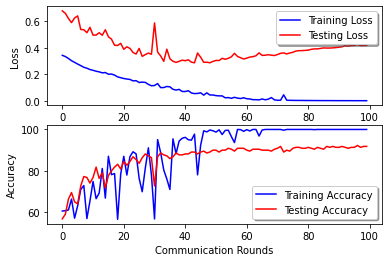

In [169]:
server.federated_learning()

In [170]:
df.shape

(1984, 2)